Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: ISLR


[1] "Year"      "Lag1"      "Lag2"      "Lag3"      "Lag4"      "Lag5"     
[7] "Volume"    "Today"     "Direction"

      Year           Lag1                Lag2                Lag3          
 Min.   :2001   Min.   :-4.922000   Min.   :-4.922000   Min.   :-4.922000  
 1st Qu.:2002   1st Qu.:-0.639500   1st Qu.:-0.639500   1st Qu.:-0.640000  
 Median :2003   Median : 0.039000   Median : 0.039000   Median : 0.038500  
 Mean   :2003   Mean   : 0.003834   Mean   : 0.003919   Mean   : 0.001716  
 3rd Qu.:2004   3rd Qu.: 0.596750   3rd Qu.: 0.596750   3rd Qu.: 0.596750  
 Max.   :2005   Max.   : 5.733000   Max.   : 5.733000   Max.   : 5.733000  
      Lag4                Lag5              Volume           Today          
 Min.   :-4.922000   Min.   :-4.92200   Min.   :0.3561   Min.   :-4.922000  
 1st Qu.:-0.640000   1st Qu.:-0.64000   1st Qu.:1.2574   1st Qu.:-0.639500  
 Median : 0.038500   Median : 0.03850   Median :1.4229   Median : 0.038500  
 Mean   : 0.001636   Mean   : 0.00561   Mean   :1.4783   Mean   : 0.003138  
 3rd Qu.: 0.596750   3rd Qu.: 0.59700   3rd Qu.:1.6417   3rd Qu.: 0.596750  
 Max. 

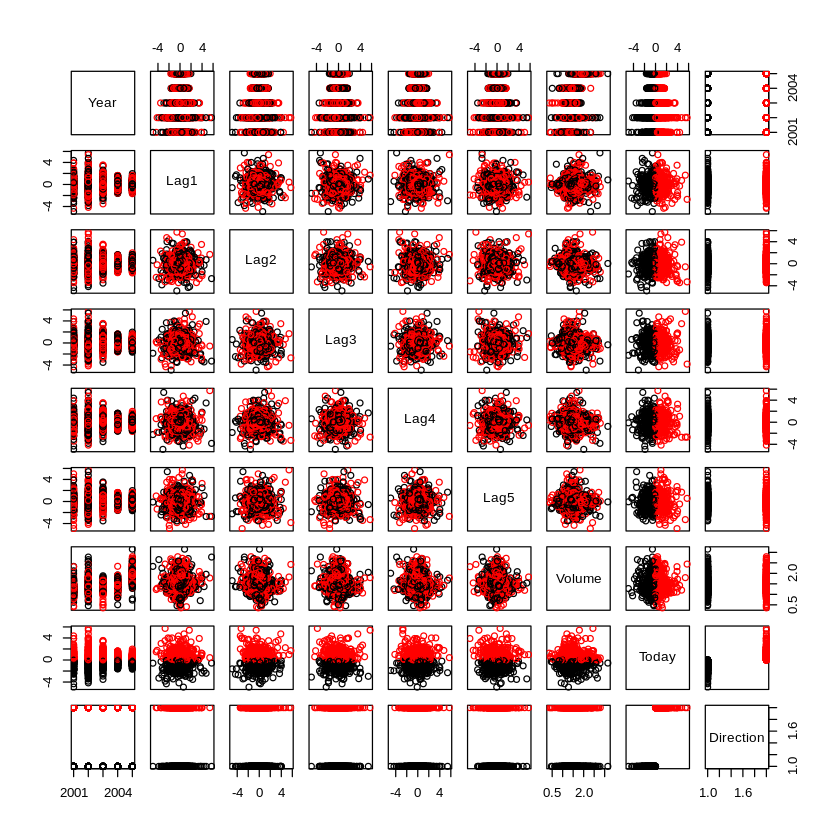

In [1]:
install.packages('ISLR') 
install.packages('MASS') 

require(ISLR)
names(Smarket)
summary(Smarket)
?Smarket
pairs(Smarket,col=Smarket$Direction)


In [2]:
# Logistic regression
glm.fit=glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume,
            data=Smarket,family=binomial)
summary(glm.fit)
glm.probs=predict(glm.fit,type="response") 
glm.probs[1:5]
glm.pred=ifelse(glm.probs>0.5,"Up","Down")
attach(Smarket)
table(glm.pred,Direction)
mean(glm.pred==Direction)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Smarket)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.446  -1.203   1.065   1.145   1.326  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept) -0.126000   0.240736  -0.523    0.601
Lag1        -0.073074   0.050167  -1.457    0.145
Lag2        -0.042301   0.050086  -0.845    0.398
Lag3         0.011085   0.049939   0.222    0.824
Lag4         0.009359   0.049974   0.187    0.851
Lag5         0.010313   0.049511   0.208    0.835
Volume       0.135441   0.158360   0.855    0.392

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1731.2  on 1249  degrees of freedom
Residual deviance: 1727.6  on 1243  degrees of freedom
AIC: 1741.6

Number of Fisher Scoring iterations: 3


1         2         3         4         5 
0.5070841 0.4814679 0.4811388 0.5152224 0.5107812

        Direction
glm.pred Down  Up
    Down  145 141
    Up    457 507

[1] 0.5216

In [3]:
# Make training and test set
train = Year<2005
glm.fit=glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume,
            data=Smarket,family=binomial, subset=train)
glm.probs=predict(glm.fit,newdata=Smarket[!train,],type="response") 
glm.pred=ifelse(glm.probs >0.5,"Up","Down")
Direction.2005=Smarket$Direction[!train]
table(glm.pred,Direction.2005)
mean(glm.pred==Direction.2005)
#Fit smaller model
glm.fit=glm(Direction~Lag1+Lag2,
            data=Smarket,family=binomial, subset=train)
glm.probs=predict(glm.fit,newdata=Smarket[!train,],type="response") 
glm.pred=ifelse(glm.probs >0.5,"Up","Down")
table(glm.pred,Direction.2005)
mean(glm.pred==Direction.2005)
106/(76+106)


require(MASS)


        Direction.2005
glm.pred Down Up
    Down   77 97
    Up     34 44

[1] 0.4801587

        Direction.2005
glm.pred Down  Up
    Down   35  35
    Up     76 106

[1] 0.5595238

[1] 0.5824176

Loading required package: MASS


Call:
lda(Direction ~ Lag1 + Lag2, data = Smarket, subset = Year < 
    2005)

Prior probabilities of groups:
    Down       Up 
0.491984 0.508016 

Group means:
            Lag1        Lag2
Down  0.04279022  0.03389409
Up   -0.03954635 -0.03132544

Coefficients of linear discriminants:
            LD1
Lag1 -0.6420190
Lag2 -0.5135293

ERROR: Error in lda.pred[1:5, ]: número incorreto de dimensiones


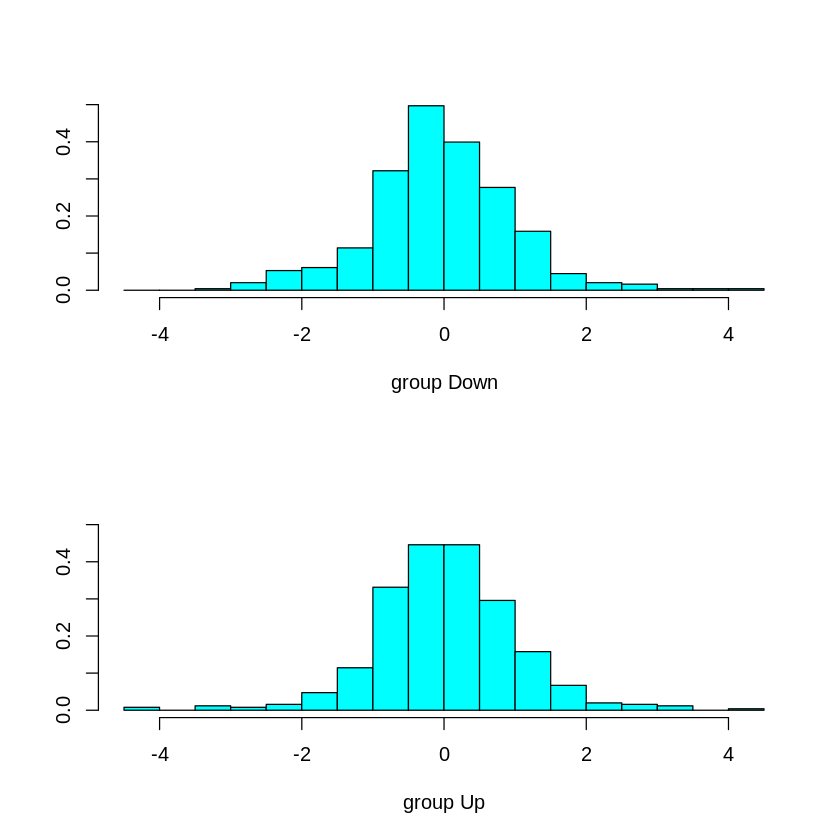

In [4]:
## Linear Discriminant Analysis
lda.fit=lda(Direction~Lag1+Lag2,data=Smarket, subset=Year<2005)
lda.fit
plot(lda.fit)
Smarket.2005=subset(Smarket,Year==2005)
lda.pred=predict(lda.fit,Smarket.2005)
lda.pred[1:5,]
class(lda.pred)
data.frame(lda.pred)[1:5,]
table(lda.pred$class,Smarket.2005$Direction)
mean(lda.pred$class==Smarket.2005$Direction)


In [5]:
## K-Nearest Neighbors
library(class)
?knn
attach(Smarket)
Xlag=cbind(Lag1,Lag2)
train=Year<2005
knn.pred=knn(Xlag[train,],Xlag[!train,],Direction[train],k=1)
table(knn.pred,Direction[!train])
mean(knn.pred==Direction[!train])


The following objects are masked from Smarket (pos = 5):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year



        
knn.pred Down Up
    Down   43 58
    Up     68 83

[1] 0.5